In [154]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [155]:
training = pd.read_csv('training_data.csv', encoding = "latin")

In [156]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [157]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [158]:
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


<AxesSubplot:>

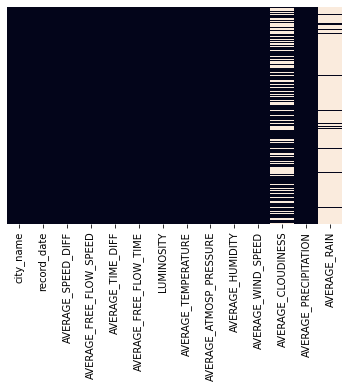

In [159]:
sns.heatmap(training.isnull(),yticklabels=False,cbar=False)

In [160]:
print(training.shape)
training.isnull().sum()

(6812, 14)


city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

In [161]:
training['AVERAGE_CLOUDINESS'].value_counts()

céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [162]:
training['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [163]:
training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].fillna(training['AVERAGE_CLOUDINESS'].mode()[0])

In [164]:
print(training.shape)
training['AVERAGE_CLOUDINESS'].value_counts()


(6812, 14)


céu claro            4264
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [165]:
training['record_date'].value_counts().sort_values(ascending=False)

2019-08-29 07:00:00    1
2019-09-01 16:00:00    1
2019-06-06 12:00:00    1
2018-11-15 07:00:00    1
2018-10-03 21:00:00    1
                      ..
2018-10-02 04:00:00    1
2019-01-30 01:00:00    1
2019-09-17 09:00:00    1
2019-09-15 01:00:00    1
2019-06-15 21:00:00    1
Name: record_date, Length: 6812, dtype: int64

In [166]:
training.drop(['AVERAGE_RAIN','city_name','record_date'],axis=1,inplace=True)

In [167]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   object 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   object 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   object 
 10  AVERAGE_PRECIPITATION    6812 non-null   float64
dtypes: float64(8), object(3)
memory usage: 585.5+ KB


In [168]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [191]:
X_train = training.drop('AVERAGE_SPEED_DIFF',axis='columns')
y_train = training.AVERAGE_SPEED_DIFF 
X_train.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION
0,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,céu claro,0.0
1,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0
2,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,céu claro,0.0
3,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0
4,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,céu claro,0.0


In [177]:
from sklearn.compose import make_column_transformer

In [183]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['LUMINOSITY','AVERAGE_CLOUDINESS']),
    remainder='passthrough'
)

In [184]:
column_trans.fit_transform(X_train)

array([[  0.,   1.,   0., ..., 100.,   3.,   0.],
       [  0.,   1.,   0., ...,  53.,   5.,   0.],
       [  0.,   1.,   0., ...,  61.,   4.,   0.],
       ...,
       [  1.,   0.,   0., ...,  39.,   4.,   0.],
       [  1.,   0.,   0., ...,  81.,   1.,   0.],
       [  1.,   0.,   0., ...,  72.,   4.,   0.]])

In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [205]:
logreg = LogisticRegression(solver='lbfgs', max_iter=20000)

In [206]:
pipe = make_pipeline(column_trans, logreg)

In [207]:
cross_val_score(pipe, X_train,y_train,cv=5,scoring='accuracy').mean()

0.7651220692025343